### Patrones en minería de datos

# Tarea 1: Beer Clustering

## a) Descarga de Dataset: 
Descargado. 

## b) Descripcion del Dataset:

El Dataset está compuesto de 1.048.576 datos descritos por 13 atributos.

#### **Lista de atributos:**

1. **brewery_id:** Identificador de la compañia. <span style="color:green"> **<** int **>** </span>
2. **brewery_name:** Nombre de la compañia. <span style="color:green"> **<** string **>** </span>
3. **review_time:** Hora cuando fue realizada la reseña. <span style="color:green"> **<** int **>** </span>
4. **review_overall:** Nota general al producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
5. **review_aroma:** Nota al aroma del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
6. **review_appearance:** Nota al cuerpo (apariencia) del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
7. **review_profilename:** Nombre del usuario que realizó la reseña. <span style="color:green"> **<** string **>** </span>
8. **beer_style:** Nombre del estilo de la cerveza. <span style="color:green"> **<** string **>** </span>
9. **review_palate:** Nota de sensación al paladar del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
10. **review_taste:** Nota al sabor del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
11. **beer_name:** Nombre de la cerveza. <span style="color:green"> **<** string **>** </span>
12. **beer_abv:** Porcentaje de alcohol por volumen de la cerveza. <span style="color:green"> **<** int **>** </span> Rango: [0-100]
13. **beer_beerid:** Identificador de la cerveza. <span style="color:green"> **<** int **>** </span>


## c) Prueba de algoritmos:

Para la correcta ejecución del siguiente informe es necesaria la ejecución de las siguientes importaciones de librerias. Puede ver los algoritmos individualmente en sus respectivos archivos en el repositorio. [Ir al repositorio](https://github.com/roloow/Patrones-en-Mineria-de-Datos/tree/master/Tarea%201)

### Librerias y funciones

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import sklearn

# Normalizador de información mutua
from sklearn.metrics import normalized_mutual_info_score as NMI
# Normalizador
from sklearn.preprocessing import StandardScaler as SS
# Dimensionador
from sklearn.decomposition import PCA 
# Gestionador de clusters
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans

### Archivo para generar DataSet

In [137]:
CSV_PATH = 'datos_prueba/prueba20.000.csv'

### Gestión del DataSet

Nos encontramos con que la información no es completamente comparable y para poder generar una buena solución utilizaremos solo datos del tipo numéricos. Es por esto que una vez leido y extraida la información del archivo **.csv** filtramos los datos numéricos con excepción a el atributo temporal y los identificadores.

Continuando, el archivo contiene algunos atributos vacios los cuales, al ser numéricos equivales a 0, por lo que hemos decidido utilizar la funcionalidad `.fillna()` que intercambia los valores **NaN** por lo que le demos a la función. (*En este caso, 0*).

Finalmente se procede a normalizar los datos para luego reducir su dimensionalidad mediante las herramientas de **StandardScaler** y **PCA** de **SKLearn** respectivamente.

In [138]:
# Se obtienen los datos del archivo
dataset = pd.read_csv(CSV_PATH)

# Se filtra el dataset por valores numéricos sin contar brewery_time e identificadores
data = pd.DataFrame({'review_overall':    dataset['review_overall'],
                     'review_aroma':      dataset['review_aroma'],
                     'review_appearance': dataset['review_appearance'],
                     'review_palate':     dataset['review_palate'],
                     'review_taste':      dataset['review_taste'],
                     'beer_abv':          dataset['beer_abv']})

# Se arregla el dataset asumiendo 0 == vacio - Error: NaN found
data = data.fillna(0)

# Se normalizan los datos y se disminuye la dimención
data = SS().fit_transform(data)
data = PCA(n_components = 2).fit_transform(data)

### 1. K-Means

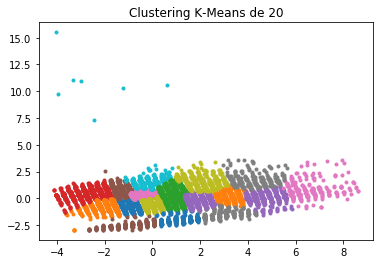

In [139]:
# Parametros
CLUSTERS = 20
MAX_IT = 50

# Inicialización de K-Means
k_means = KMeans(init='k-means++', n_clusters=CLUSTERS, n_init=MAX_IT)
k_means.fit(data)

# Asignación de labels
labels_kmeans = k_means.labels_


for label in np.unique(labels_kmeans):
    plt.plot(data[labels_kmeans == label, 0], data[labels_kmeans == label, 1], '.')

plt.title('Clustering K-Means de ' + str(CLUSTERS))
plt.show()

Como K-means busca centroides dado el número de clusters comenzamos ajustando el número de clusters según su represntacion grafica, y definimos un número maximo de iteraciones igual a 50, ya que parece un valor prudente, por tiempo de ejecución, luego se comenzo con 2 clusters y luego con 4. los resultados graficos no fueron combincentes ya que se puede apreciar que existen algunos outliers y luego dos grupos relativamente densos, pero el algoritmo no fue capaz de distinguir esta situación, y con forme se aumentan los clusters solo se van sub-dividiendo las secciones de gran densidad. hasta que dejamos un valor de 20 clusters, que destaca por dejar todos los outliers en un mismo cluster.

### 2. Minibacht k-means

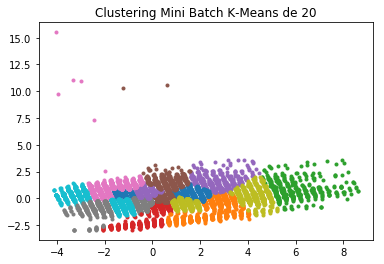

In [140]:
CLUSTERS = 20
MAX_IT = 1000
BATCH_SIZE = 100
MAX_NI = 10

# Inicialización de MiniBatch K-Means
mnk_means = MiniBatchKMeans(init='k-means++', n_clusters=CLUSTERS, n_init=MAX_IT, batch_size=BATCH_SIZE, max_no_improvement=MAX_NI)
mnk_means.fit(data)

# Asignación de labels
labels_mbkmeans = mnk_means.labels_


for label in np.unique(labels_mbkmeans):
    plt.plot(data[labels_mbkmeans == label, 0], data[labels_mbkmeans == label, 1], '.')

plt.title('Clustering Mini Batch K-Means de ' + str(CLUSTERS))
plt.show()

Al igual que con k-means, el ajuste de los parametros se inicio con 2 clusters y se fue aumentando el número de estos, con los parametros maximo de iteraciones fijo en 1000 y tamaño del bach igual a 100, los resultados como era de esperar fueron muy semejantes a K-means, pero con algunos clusters de formas mas regulares, que pueden ser justificados por el número de iteraciones que usamos, que es mayor que el de K-means.

### 3. HAC Complete 

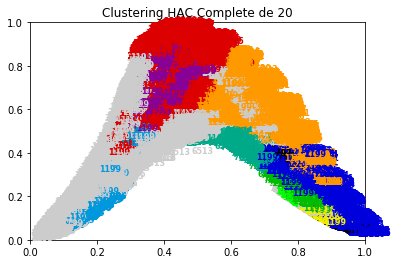

In [141]:
CLUSTERS =20
MAX_IT = 10

from sklearn import manifold
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(data)


clustering = AgglomerativeClustering(linkage = 'complete', n_clusters = CLUSTERS, affinity = 'euclidean', connectivity = None)
clustering.fit(data)
# Asignación de labels
labels_hac = clustering.labels_

# etiquetas 
y = dataset['brewery_id'] 
x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)
for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], str(y[i]),
	color=plt.cm.spectral(clustering.labels_[i]/10.),
	fontdict={'weight': 'bold', 'size': 8})

plt.title('Clustering HAC Complete de ' + str(CLUSTERS))    
plt.show()



HAC al ser un aglomertivo, e intentar unir los punto mas cercanos, llama la atencion que exitan 5 clusters de gran tamaño y que el resto sea tan pequeño, cabe destacar que se utilizo el mismo numero de clusters que en k-means y que en minibatch k-means, para tener una compartiva, como se toma la distancia euclidiana y se van uniendo los clusters mas cercanos, es importante mencionar el el cluster azul, realmente es pequeño en datos, que las etiquetas impiden ver que corres ponden a los outliers. 

### 4. Ward

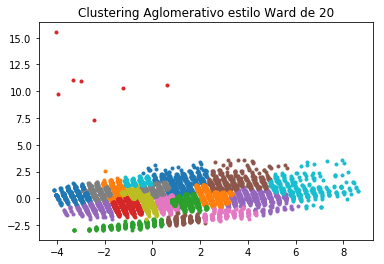

In [142]:
CLUSTERS = 20

a_ward = AgglomerativeClustering(linkage='ward', n_clusters=CLUSTERS)
a_ward.fit(data)

# Asignación de labels
labels_ward = a_ward.labels_


for label in np.unique(labels_ward):
    plt.plot(data[labels_ward == label, 0], data[labels_ward == label, 1], '.')

plt.title('Clustering Aglomerativo estilo Ward de ' + str(CLUSTERS))
plt.show()

Como Ward busca unir los clusters que presenten un incremento menor en el valor total de la suma de las diferencias cuadradas y usamos distancias euclidianas, Ward se deberia comportar de forma semejante a k-means, por buscar los mejores centroides, pero como lo hace sin tener semillas si no que uniendo clusters, su resultado no depende de un numero de iteraciones, estos algoritmos tiene problemas con agrupaciones alargadas o de formas iregulares.

### 5. DBScan

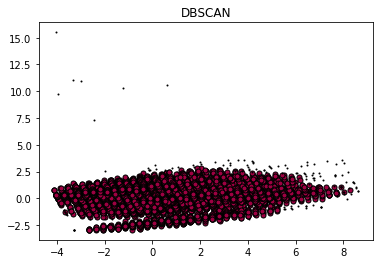

In [143]:
EPS = 0.5
MIN_PTS=15

db = DBSCAN(eps=EPS, min_samples=MIN_PTS).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True


# Asignación de labels
labels = db.labels_
labels_dbscan = labels 



unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = data[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5)
	xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=1)

plt.title("DBSCAN")
plt.show()


DBSCAN al ser un algortimo de densidad, obtiene un solo cluster con valores de EPS y de min ponints, ajustados a 0.5 y de 15 respectivamnete, se probó con otros valores, pero siempre se obtubieron valores semejantes, donde solo se destaca un gran cluster, y otros puntos noise points que representan mas que nada outliers, se puede justificar tambien la existencia de solo un cluster por el echo de usar todas las dimensiones disponibles, ello podira traer por consecuente que por alta dimensionalidad los puntos tienden a juntarse al usar distancia euclidiana, por ello se descartar el atributo 'review_overall', que podria ser redundante por el resto de los atributos, y con ello se obtuvieron 2 cluster lo cual visualmente se ve correcto y se usaron los mismo valores EPS y MIN POINTS, si modificamos el valor de EPS a 0.3 tendriamos 19 clusters, pero graficamente no se aprecia que estos clusters sean represntativos, por lo que el valor de EPS se dejo como 0.5.

## d) Análisis de etiquetas

Para hacer el análisis de estos patrones utilizaremos las herramientas de **SKLearn** de `metrics`, siendo la que utilizaremos la normalización mutua de información `normalized_mutual_info_score`, la cual abreviaremos como **NMI**.

Para este apartado se pide revisar nombre de la cervecería y tipo de la cerveza para esto utilizaremos sus identificadores que nos permitiran de manera alternativa al string analizar numéricamente la utilidad.

In [144]:
cervecerias = pd.DataFrame({'brewery_id' :dataset['brewery_id']})
cervezas = pd.DataFrame({'beer_beerid' :dataset['beer_beerid']})

cervecerias = cervecerias.values.flatten().tolist()
cervezas = cervezas.values.flatten().tolist()

Una vez tenemos los datos que requerimos, procedemos a generar el índice **NMI** según las etiquetas creadas en los casos anteriores.

        NMI(data, labels)

- K-Means

In [145]:
print "Índice para cervecería:", NMI(cervecerias, labels_kmeans)
print "Índice para tipo de cervezas:", NMI(cervezas, labels_kmeans)

Índice para cervecería: 0.197054239568
Índice para tipo de cervezas: 0.346455744409


- Mini Batch K-Means

In [146]:
print "Índice para cervecería:", NMI(cervecerias, labels_mbkmeans)
print "Índice para tipo de cervezas:", NMI(cervezas, labels_mbkmeans)

Índice para cervecería: 0.196041059962
Índice para tipo de cervezas: 0.354371719481


- Hac Complete

In [147]:
 print "Índice para cervecería:", NMI(cervecerias, labels_hac)
 print "Índice para tipo de cervezas:", NMI(cervezas, labels_hac)

Índice para cervecería: 0.179857347258
Índice para tipo de cervezas: 0.302107124023


- Ward

In [148]:
print "Índice para cervecería:", NMI(cervecerias, labels_ward)
print "Índice para tipo de cervezas:", NMI(cervezas, labels_ward)

Índice para cervecería: 0.188662062174
Índice para tipo de cervezas: 0.337715141383


- DBScan

In [149]:
print "Índice para cervecería:", NMI(cervecerias, labels_dbscan)
print "Índice para tipo de cervezas:", NMI(cervezas, labels_dbscan)

Índice para cervecería: 0.0270663190054
Índice para tipo de cervezas: 0.0407719442019


Con estos resultados podemos analizar caso a caso la cercanía en términos relativos de los identificadores individuales pedidos.

Podemos notar que todos los indices son bastante pequeños, estos seran mejores mientras mas cercanos a 1 sean, cabe destacar que en los casos cercanos a su vez no nos brindarian una información nueva, ya que en general seria una relación obvia entre las variables, por lo que esperariamos un valor rondando los 0.6 a 0.8, pero ello no se dío, de todas formas por los resultados obtenidos el tipo de cerveza seria el que mejor describe a los clusters en todas las ocaciones, y la mejor marca que obtiene es  0.354371719481 obtenida por minibatch k-means.

Para determinar el mejor tipo de cerveza podemos tomar seleccionar entre las que fueron representadas en las graficas en la esquina superior derecha, pero para tener un mejor resultado, lo mejor seria quitar de las dimensiones el atributo 'Beer_abv', y luego los que tengan mayor distancia al origen seran los que presenten una mayor posibilidad de ser un mejor tipo de cerveza.
